**PROJECT 1: CONFIGURE GOOGLE AS HOST**

Cloud-based notebooks provide a remote workspace with stronger resources than our local laptop might allow. Cloud notebooks permit us to share our work with others, such as coworkers, similar to GitHub.
The Colab, which are Google-hosted notebooks. Some setup is required, so we'll start there before getting back to the basics of PySpark.

In [1]:
import pandas as pd
drivers_df = pd.read_csv("cleaned_data/drivers_sample.csv")

In [3]:
drivers_df.head()

,DRIVER_ID,GENDER,CREDIT_SCORE,AGE,VEHICLE_ID
0,1,2.0,824,27.0,7420963
1,2,1.0,824,28.0,7420963
2,3,2.0,666,51.0,7396448
3,4,2.0,666,34.0,6208988
4,5,2.0,824,88.0,6078430


In [4]:
drivers_df.dtypes

DRIVER_ID         int64
GENDER          float64
CREDIT_SCORE      int64
AGE             float64
VEHICLE_ID        int64
dtype: object

In [5]:
# Check coloume names - it had a space before, make sure it is checked
drivers_df.columns = [c.upper().replace(' ', '_') for c in drivers_df.columns]
drivers_df.columns

Index(['DRIVER_ID', 'GENDER', 'CREDIT_SCORE', 'AGE', 'VEHICLE_ID'], dtype='object')

In [6]:
drivers_df.isna().sum()

DRIVER_ID        0
GENDER          10
CREDIT_SCORE     0
AGE              6
VEHICLE_ID       0
dtype: int64

In [7]:
# Replace Driver ID to increased index id - remember, it only represent a person and a person is hidden 
# No duplicate of person

drivers_df["DRIVER_ID"] = np.arange(1, len(drivers_df) + 1)
drivers_df = drivers_df.assign(Index=range(len(drivers_df))).set_index('DRIVER_ID')
drivers_df.drop(drivers_df.columns[len(drivers_df.columns)-1], axis=1, inplace=True)

drivers_df.head()

NameError: name 'np' is not defined

In [59]:
drivers_df.to_csv("cleaned_data/drivers.csv", index=True)

<AxesSubplot:title={'center':'VEHICLE ID vs. CREDIT SCORE'}, xlabel='VEHICLE_ID', ylabel='CREDIT_SCORE'>

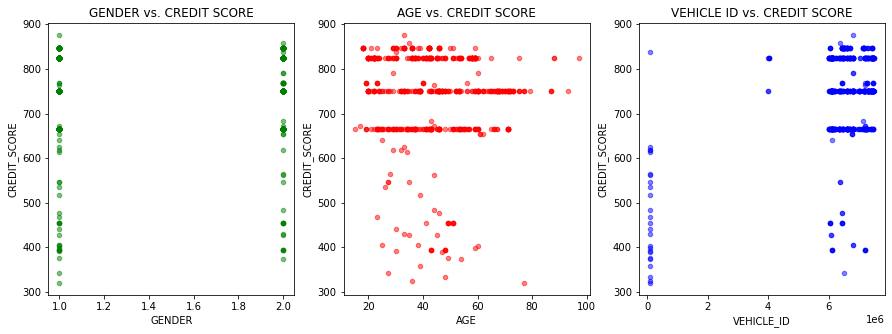

In [10]:
#How about scatter related to Credit Score?
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
drivers_df.plot(kind='scatter', x='GENDER', y='CREDIT_SCORE', alpha=0.5, color='green', ax=axes[0], title="GENDER vs. CREDIT SCORE")
drivers_df.plot(kind='scatter', x='AGE', y='CREDIT_SCORE', alpha=0.5, color='red', ax=axes[1], title="AGE vs. CREDIT SCORE")
drivers_df.plot(kind='scatter', x='VEHICLE_ID', y='CREDIT_SCORE', alpha=0.5, color='blue', ax=axes[2], title="VEHICLE ID vs. CREDIT SCORE")